In [1]:
from pathlib import Path
import pandas as pd
import tomli  

config_path = Path.cwd().parent / "config.toml"

with open(config_path, "rb") as f:
    config = tomli.load(f)
dataset_path = config["paths"]["dataset"]
full_dataset_path = Path.cwd().parent / dataset_path

df = pd.read_csv(full_dataset_path)
df.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
encoded_label = le.fit_transform(df['Location'])
df_v02 = df.copy()
df_v02.drop("Location", axis=1, inplace=True)
df_v02['Location'] = encoded_label
df_v02.head()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Location
0,4850000,720,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,136
1,4500000,600,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1,136
2,6700000,650,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,136
3,4500000,650,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,136
4,5000000,665,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,136


## Linear Regression 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [20]:
# Isoloate dependent and independent features
X = df_v02.drop(['Price'],axis = 'columns')
y = df_v02.Price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 8071352.729560026
MSE: 196006431582475.12
RMSE: 14000229.697489792
R² Score: 0.3742471054134735


- MAE, MSE and RMSE are very large indicating there is much difference between the actual value and predicted value. 
- R2 shows only 37% of variance in the data has been explained.

## IQR based outlier removing

In [29]:
Q1 = df_v02['Price'].quantile(0.25)
Q3 = df_v02['Price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_v03 = df_v02[(df_v02['Price'] >= lower_bound) & (df_v02['Price'] <= upper_bound)]

In [33]:
def applyLinearRegression(data):
    X = data.drop(['Price'],axis = 'columns')
    y = data.Price
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R² Score:", r2)

    return (mae, mse, rmse, r2)


In [34]:
# Applying linear regression to new dataset
results_02 = applyLinearRegression(df_v03)

MAE: 6420750.395669909
MSE: 76257872017834.0
RMSE: 8732575.337083213
R² Score: -0.26178147035333277


- MAE, MSE and RSME has reduced.
- -ve RSME indicate the model performs worst than a avg horizontal line model. 
- This could be due to removal of too much of data in outlier removal process.

In [39]:
print("Original Data: ", df_v02.shape)
print("Removed outlier Data: ", df_v03.shape)

Original Data:  (6347, 18)
Removed outlier Data:  (5881, 18)


In [40]:
(6347-5881) / 6347

0.0734205136284859

- Too much of data has been removed. Around 7%.
- Feature engineering needs to be performed or use othe models to check the performance.

In [42]:
# Relaxed IQR
Q1 = df_v02['Price'].quantile(0.25)
Q3 = df_v02['Price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

df_v04 = df_v02[(df_v02['Price'] >= lower_bound) & (df_v02['Price'] <= upper_bound)]

In [44]:
print("Original Data: ", df_v02.shape)
print("Removed outlier Data: ", df_v03.shape)
print("Relaxed IQR outlier removed Data: ", df_v04.shape)

Original Data:  (6347, 18)
Removed outlier Data:  (5881, 18)
Relaxed IQR outlier removed Data:  (6113, 18)


In [45]:
# Applying linear regression to new dataset
results_03 = applyLinearRegression(df_v04)

MAE: 6690643.828820394
MSE: 86810337901483.08
RMSE: 9317206.550328434
R² Score: 0.03621009905697836


In [46]:
# Applying linear regression to new dataset
results_01 = applyLinearRegression(df_v02)

MAE: 8071352.729560026
MSE: 196006431582475.12
RMSE: 14000229.697489792
R² Score: 0.3742471054134735


In [52]:
lr_all_res = [results_01, results_02, results_03]

In [53]:
df = pd.DataFrame(lr_all_res, columns=["MAE", "MSE", "RMSE", "R2"])
df.index = ["Model 1", "Model 2", "Model 3"]

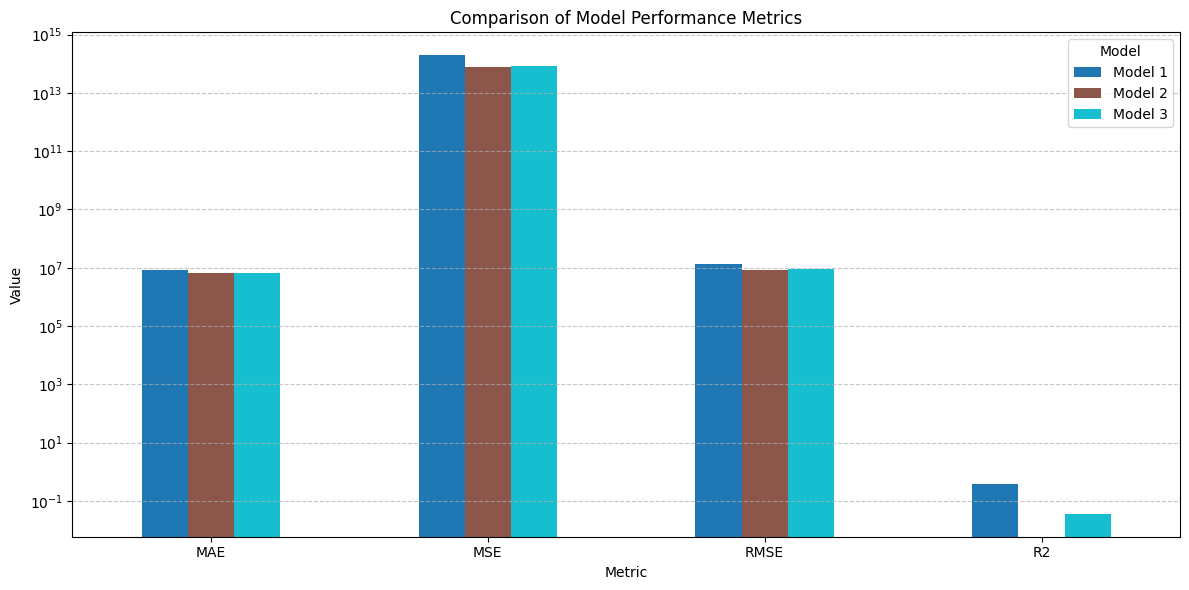

In [ ]:
df_t = df.transpose()

ax = df_t.plot(kind='bar', figsize=(12, 6), colormap='tab10')
plt.title("Comparison of Model Performance Metrics")
plt.xlabel("Metric")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.legend(title="Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale("log")
plt.tight_layout()
plt.show()

## Random forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
X = df_v02.drop(['Price'],axis = 'columns')
y = df_v02.Price

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
rforest_mode = RandomForestRegressor(n_estimators=100, 
                                random_state=28, )
rforest_mode.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [73]:
y_pred = rforest_mode.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:,.2f}")
print(f"MSE:  {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²:   {r2:.4f}")

rf_result_01 = (mae, mse, rmse, r2)

MAE:  4,344,188.34
MSE:  154,172,970,751,744.84
RMSE: 12,416,640.88
R²:   0.5078


- R2 has improve significantly. 
- RMSE > MAE indicates huge outliers in the model.

In [78]:
from sklearn.model_selection import GridSearchCV, train_test_split

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 30, None],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['log2', 'sqrt']
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1  
)

grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Step 7: Evaluate on test set
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nFinal Evaluation on Test Set:")
print(f"MAE:  {mae:,.2f}")
print(f"MSE:  {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²:   {r2:.4f}")

rf_result_02 = (mae, mse, rmse, r2)

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Final Evaluation on Test Set:
MAE:  4,924,568.03
MSE:  136,721,945,812,816.88
RMSE: 11,692,815.99
R²:   0.5635
